# CS640 Homework 1: ROC Analysis and Ethics

In this assignment, you will answer some questions regarding ROC analysis.

## Collaboration
You are allowed to work in a team of at most **three** on the coding part (**Q1**), but you must run the experiments and answer written questions independently.

## Instructions

### General Instructions
In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Most of the written questions are followed by a cell for you enter your answers. If not, please insert one. Your answers and the questions should **not** be in the same cell.

### Instructions on Math
Some questions require you to enter math expressions. To enter your solutions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$.

Alternatively, you can scan your work from paper and insert the image(s) in a text cell.

## Submission
Once you are ready, save the notebook as PDF file (File -> Print -> Save as PDF) and submit to Gradescope. Make sure all outputs are visible.

## Q0: Name(s)

Please write your name in the next cell. If you are collaborating with someone, please list their names as well.

Bohan WANG

## Q1: Confusion Matrix

In the next cell, write code to manually compute the confusion matrix for a **binary** classification task and run the cell to test your code.

The function `confusion_matrix` from sklearn is used to verify your answers, but you should **not** use it in your implemention.

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(YTrue, YPredict):
    """
    Computes the confusion matrix as a numpy matrix. For convention, the
    vertical axis represent YTrue while the horizontal axis represent YPredict.
    """
    cm = np.zeros((2, 2))

    ############################ start of your code ############################
    TP=(YTrue & YPredict).sum()
    FP=(np.logical_not(YTrue) & YPredict).sum()
    TN=(np.logical_not(YTrue) & np.logical_not(YPredict)).sum()
    FN=(YTrue & np.logical_not(YPredict)).sum()
    cm[0,0]=TN
    cm[1,0]=FN
    cm[0,1]=FP
    cm[1,1]=TP

    ############################# end of your code #############################

    return cm

is_correct = True
for _ in range(10):
    rng = np.random.default_rng()
    YTrue = rng.choice([0, 1], size = 100)
    YPredict = rng.choice([0, 1], size = 100)
    if (compute_confusion_matrix(YTrue, YPredict) != confusion_matrix(YTrue, YPredict)).any():
        is_correct = False
        break
print(is_correct)

True


## Q2: Metrics

### Q2.1
Suppose that we are given the confusion matrices and the ROC curves of two models **A** and **B**.

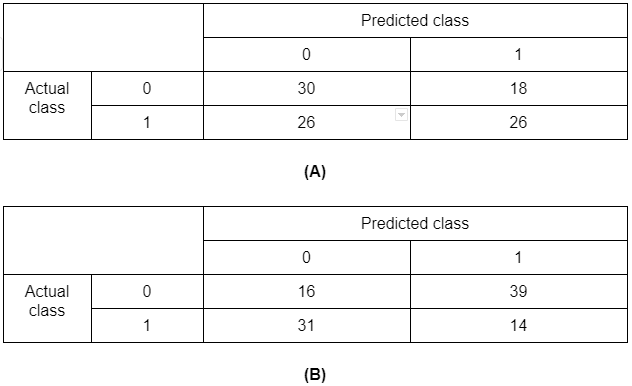

For each of the two models,

1. compute true positive rate (TPR), false negative rate (FNR), false positive rate (FPR), and true negative rate (TNR); and
2. compute accuracy, precision, recall and F-1 score.

You can do it either by hand or by code (do **not** use existing functions). Either way, show details of your calculations in a new cell using variables TP, FN, FP, and TN. Round your answers to four digits if you choose to use decimals.

In [61]:
#For model A
TP=26
FP=18
TN=30
FN=26
TPR=TP/(TP+FN)
print("model A's TPR: %.4f"% TPR)
FNR=FN/(TP+FN)
print("model A's FNR: %.4f"% FNR)
FPR=FP/(FP+TN)
print("model A's FPR: %.4f"% FPR)
TNR=TN/(FP+TN)
print("model A's TNR: %.4f"% TNR)
Acc=(TP+TN)/(TP+TN+FP+FN)
print("model A's Accuarcy: %.4f"% Acc)
Prec=TP/(TP+FP)
print("model A's Precision: %.4f"% Prec)
Recall=TPR
print("model A's Recall: %.4f"% Recall)
F1=(2*Prec*Recall)/(Prec+Recall)
print("model A's F1 score: %.4f"% F1)

model A's TPR: 0.5000
model A's FNR: 0.5000
model A's FPR: 0.3750
model A's TNR: 0.6250
model A's Accuarcy: 0.5600
model A's Precision: 0.5909
model A's Recall: 0.5000
model A's F1 score: 0.5417


In [62]:
#For model B
TP=14
FP=39
TN=16
FN=31
TPR=TP/(TP+FN)
print("model B's TPR: %.4f"% TPR)
FNR=FN/(TP+FN)
print("model B's FNR: %.4f"% FNR)
FPR=FP/(FP+TN)
print("model B's FPR: %.4f"% FPR)
TNR=TN/(FP+TN)
print("model B's TNR: %.4f"% TNR)
Acc=(TP+TN)/(TP+TN+FP+FN)
print("model B's Accuarcy: %.4f"% Acc)
Prec=TP/(TP+FP)
print("model B's Precision: %.4f"% Prec)
Recall=TPR
print("model B's Recall: %.4f"% Recall)
F1=(2*Prec*Recall)/(Prec+Recall)
print("model B's F1 score: %.4f"% F1)

model B's TPR: 0.3111
model B's FNR: 0.6889
model B's FPR: 0.7091
model B's TNR: 0.2909
model B's Accuarcy: 0.3000
model B's Precision: 0.2642
model B's Recall: 0.3111
model B's F1 score: 0.2857


### Q2.2

The two ROC curves are labeled as 1 and 2 in the following figure.

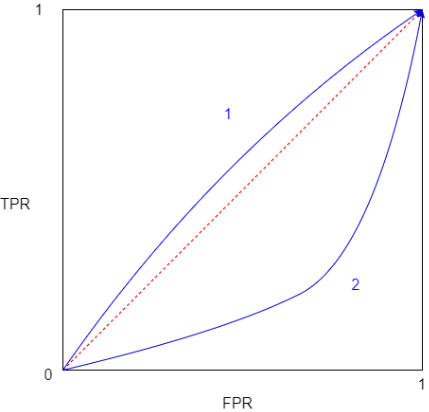

1. Which one represents a better model? Briefly explain.
2. Based on your results in Q2.1, which ROC curve is more likely to be associated with model **A** and which is more likely to be associated with model **B**? Briefly explain.

1. model 1 is better

2. ROC curve 1 is modelA. Because when Model A's TPR is 0.5, its FPR is



## Q3: Threshold

Now suppose that we have a state-of-the-art model to predict earthquakes (negative vs positive) and by default the threshold value is set to 0.5. If we don't want to trigger too many false alarms, how should we tune the threshold value (i.e., should we increase it or decrease it)? Briefly explain.

## Q4: AI and Ethics

For each the following three questions, provide an answer with **no more than three** sentences.

### Q4.1

Watch Joy Buolamwini's TED talk on [How I'm fighting bias in algorithms](https://www.ted.com/talks/joy_buolamwini_how_i_m_fighting_bias_in_algorithms). Joy mentions that judges use machine-generated risk scores to determine how long an individual is going to spend in prison. The state of Wisconsin uses the AI system Northpointe for making sentencing and parole decisions. Research this issue on the internet and provide one link to material you have read.

### Q4.2

Use some the bias terminology of Suresh and Guttag, 2021 (see lecture slides), to discuss whether you think the Northpointe system is a responsible use of AI.

### Q4.3

Research at BU and MIT by Canetti et al. ([arxiv.org/pdf/1810.02003.pdf](http://arxiv.org/pdf/1810.02003.pdf)) considers the scenario that decisions whether a prisoner should stay or leave prison can be deferred. In the publicly-available Northpointe data, decisions about Caucasian prisoners are deferred for 9% of prisoners, while decisions about African-Americans are deferred for 20% of the prisoners. Canetti et al. propose "equalizing methods" to change the AI system so that deferral decisions would be made at about the same rate for both racial groups. Briefly discuss what you think about adding an equalizing method to Northpointe's system. Would this yield a fair AI system? You may refer to Suresh and Guttag's terminology.